#### Install the libraries and load data

In [323]:
#You will need both Pandas and NumPy. If you are using a virtual environment in Visual Studio Code you may need to pip install both prior to importing.

#!pip install pandas
#!pip install numpy



import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#check for the data type for all columns. 
# addtional information [sibsp = siblings or spouse, parch = parents or children]

print(data.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [4]:
#this section is the try out the replace fuction

# Temporarily replacing a specific value value in a column : 2 ways to accomplish this below
(data.replace({'age':{2 : 0}}))
# data['age'].replace(2,0)





,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [322]:
# check the libraries that are installed 
!pip list

Package            Version
------------------ ------------
asttokens          2.4.1
certifi            2023.7.22
charset-normalizer 3.3.2
colorama           0.4.6
comm               0.1.4
contourpy          1.1.1
cycler             0.12.1
debugpy            1.8.0
decorator          5.1.1
executing          2.0.1
fonttools          4.43.1
idna               3.4
ipykernel          6.26.0
ipython            8.17.2
jedi               0.19.1
joblib             1.3.2
jupyter_client     8.5.0
jupyter_core       5.5.0
kiwisolver         1.4.5
matplotlib         3.8.1
matplotlib-inline  0.1.6
nest-asyncio       1.5.8
numpy              1.26.1
packaging          23.2
pandas             2.1.2
parso              0.8.3
Pillow             10.1.0
pip                23.3.1
platformdirs       3.11.0
prompt-toolkit     3.0.39
psutil             5.9.6
pure-eval          0.2.2
Pygments           2.16.1
pyparsing          3.1.1
python-dateutil    2.8.2
pytz               2023.3.post1
pywin32            306

<Axes: xlabel='survived', ylabel='fare'>

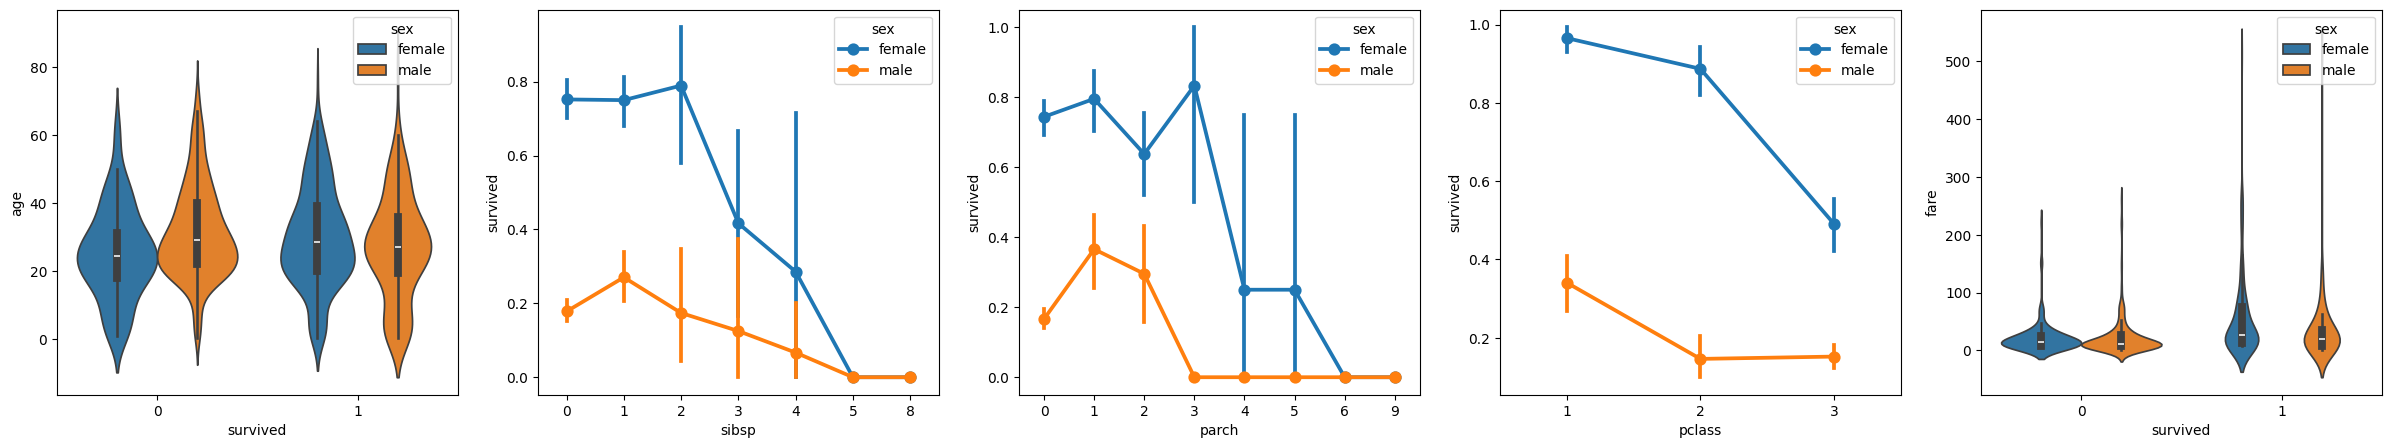

In [6]:
#analyze how certan columns of the data set relate to survivability. Import seaborn and matplotlib libraries 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
#calculate correlations between variables and survival rates

# create new column called sex_num to work on replacing
data['sex_num'] = data.sex

data.head(4)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_num
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",male
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",female
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",male


In [8]:
# first we must change the variables to numeric format: i.e. male to 0, and female to 1
data['sex_num'] = data['sex_num'].replace(['male'],1)
data['sex_num'] = data['sex_num'].replace(['female'],0)

data.head(5)
#data.replace({'male': 1, 'female': 0}, inplace=True)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_num
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [9]:
#Run correlation between all input variables to identify the features that would be the best inputs to a machine learning model.
#The closer a value is to 1, the higher the correlation between the value and the result. 
#Use the following code to correlate the relationship between all variables and survival.

data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
sex_num,0.528693


In [10]:
# Lets hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.head(5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_num,relatives
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1


In [11]:
#run the correlation again with the new 'relatives' column
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
sex_num,0.528693
relatives,0.201719


In [12]:
#After observation we can drop the columns that have low values of correlation as well as any rows that have NaN values to end up with a dataset that can be used for training a model

data_training = data[['sex_num', 'pclass','age','relatives','fare','survived']].dropna()

data_training.head(5)

,sex_num,pclass,age,relatives,fare,survived
0,0,1,29.00,0,211.3375,1
1,1,1,0.92,1,151.5500,1
2,0,1,2.00,1,151.5500,0
3,1,1,30.00,1,151.5500,0
4,0,1,25.00,1,151.5500,0


In [ ]:
### The following section will explore training and evaluating a model###
#install scikit-learn [one time needed]

#%pip install scikit-learn



In [89]:
#divide up the dataset into training and validation data
# in a later section we will use the more modern K-fold cross validation as the method of building the model
# x_train = is the training data for the variables, y_train is the training data for the outcomes

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_training[['sex_num','pclass','age','relatives','fare']], data_training.survived, train_size= 0.30, test_size = 0.25, random_state=0, shuffle = True)

x_train.head(5)



,sex_num,pclass,age,relatives,fare
43,0,1,60.0,0,76.2917
1143,1,3,7.0,1,29.1250
904,1,3,23.0,0,7.8958
719,1,3,18.0,0,8.0500
703,1,3,21.0,0,7.7500


In [53]:
x_test.head(5)

,sex_num,pclass,age,relatives,fare
281,0,1,43.0,1,55.4417
1267,0,3,30.0,1,24.1500
849,1,3,26.0,1,7.8542
1066,1,3,28.5,0,7.2292
109,1,1,36.0,0,26.3875


In [33]:
#Random generator tangent below
#setting up the variable rng shortens the code in the later portion to avoid writting the full "np.random.default_rng()" everytime
rng = np.random.default_rng()

rng.random()


0.7043944559539014

In [34]:
rng.standard_normal(10) 

array([ 3.88860679e-01, -6.40400063e-01, -2.01919393e-04,  7.18495811e-01,
        1.45363008e+00, -4.67930308e-01, -3.00584886e-01, -1.23631587e+00,
        3.66671977e-01,  4.77136288e-01])

In [35]:
rng.integers(low=0, high=10, size=5)  

array([6, 2, 0, 6, 4], dtype=int64)

In [90]:
# Retuning to the titanic model
# Normalize the input variables such that all features are treated equally. Example age 0 to 100, sex is 0 to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [86]:
#For this model we have chosen Naive Bayes algorithm to train the model. There are many different ML algorithms availble to choose from
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [87]:
#Test the model with the test data set
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

#Looking at the result of the test data, you'll see that the trained algorithm had a ~75% to 76% success rate at estimating survival

0.7557251908396947


In [116]:
# Addtional modeling of the same x_train, y_train, x_test, y_test using the Logistic regression classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( max_iter= 10000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7862595419847328

In [117]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

#using the orginal data_training dat set from before, break the x and y columns into input x-variable and output y-result data sets

x_train_2 = data_training.iloc[:,:5]
y_train_2 = data_training.iloc[:,5:]

pd.set_option('display.max_rows', 20)

#x_train_2.head()

#standardize the x_train_2 data 
X_train_2 = sc.fit_transform(x_train_2)

print(X_train_2)



[[-1.30126822 -1.43460054 -0.05922814 -0.87988269  3.13524319]
 [ 0.76848108 -1.43460054 -2.01162687  1.13651514  2.06197191]
 [-1.30126822 -1.43460054 -1.93653461  1.13651514  2.06197191]
 ...
 [ 0.76848108  0.94312755 -0.23305281 -0.87988269 -0.5288686 ]
 [ 0.76848108  0.94312755 -0.19828788 -0.87988269 -0.5288686 ]
 [ 0.76848108  0.94312755 -0.05922814 -0.87988269 -0.51720017]]
